**Business Understanding**

Thailand Happiness

find cluster

**Data Understanding**

Superstore file in csv format

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [68]:
df1=pd.read_excel('rankhappy.xls')

**Data Preparation**

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [70]:
df1.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1944,Zimbabwe,2016,3.735400,7.984372,0.768425,54.400002,0.732971,-0.094634,0.723612,0.737636,0.208555
1945,Zimbabwe,2017,3.638300,8.015738,0.754147,55.000000,0.752826,-0.097645,0.751208,0.806428,0.224051
1946,Zimbabwe,2018,3.616480,8.048798,0.775388,55.599998,0.762675,-0.068427,0.844209,0.710119,0.211726
1947,Zimbabwe,2019,2.693523,7.950132,0.759162,56.200001,0.631908,-0.063791,0.830652,0.716004,0.235354
1948,Zimbabwe,2020,3.159802,7.828757,0.717243,56.799999,0.643303,-0.008696,0.788523,0.702573,0.345736


In [71]:
df1.sample(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1691,Tajikistan,2015,5.124211,7.945079,0.843933,63.200001,0.846542,0.022057,0.741690,0.688922,0.195661
678,Haiti,2012,4.413475,7.436831,0.748663,41.419998,0.482486,0.289061,0.717166,0.593434,0.283806
939,Kyrgyzstan,2015,4.905376,8.477442,0.856585,63.200001,0.813176,0.199768,0.857725,0.766794,0.173476
1722,Thailand,2016,6.073640,9.729001,0.907544,66.800003,0.924146,0.355719,0.877978,0.834758,0.217880
727,Iceland,2015,7.498071,10.853975,0.980283,73.000000,0.940485,0.300744,0.638662,0.849021,0.179504
1041,Malawi,2011,3.946063,6.894792,0.612737,51.419998,0.733464,0.098695,0.852994,0.712759,0.268475
1050,Malaysia,2006,6.011717,9.839272,0.865900,64.959999,0.836766,0.201140,0.739797,0.750243,0.242825
1900,Vietnam,2012,5.534570,8.625951,0.775009,66.820000,0.856053,-0.110290,0.814885,0.615128,0.221356
1381,Philippines,2007,5.073562,8.607889,0.800711,60.000000,0.851566,-0.021588,0.880246,0.784118,0.378188
1871,Uzbekistan,2012,6.019332,8.549520,0.933141,63.599998,0.913550,-0.037380,0.463375,0.785679,0.118177


In [73]:
df1.Date=pd.to_datetime(df1.year,format="%Y")

In [74]:
df1.set_index('year',inplace=True)

In [77]:
df1=df1[df1['Country name'] == 'Thailand']

In [78]:
df1

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,,
2006,Thailand,5.885433,9.461148,0.894327,64.139999,0.863195,0.331460,0.934745,0.813509,0.164123
2007,Thailand,5.783891,9.508475,0.888634,64.480003,0.870159,0.390946,0.897753,0.831810,0.180010
2008,Thailand,5.636471,9.520327,0.831711,64.820000,0.867834,0.425482,0.933373,0.819038,0.145059
2009,Thailand,5.475645,9.508361,0.893245,65.160004,0.868224,0.524908,0.903822,0.897641,0.166086
2010,Thailand,6.216703,9.575911,0.897651,65.500000,0.859636,0.535985,0.916693,0.901268,0.181523
2011,Thailand,6.663609,9.579475,0.884351,65.720001,0.926882,0.400159,0.923196,0.934374,0.116676
2012,Thailand,6.300235,9.644709,0.906098,65.940002,0.846933,0.379859,0.908612,0.854544,0.137503
2013,Thailand,6.231025,9.666691,0.926378,66.160004,0.781082,0.456227,0.925430,0.845981,0.140831
2014,Thailand,6.985464,9.672178,0.933167,66.379997,0.899846,0.552521,0.919834,0.811370,0.168738


In [79]:
df1.columns

Index(['Country name', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [80]:
df1=df1.rename(columns={'Country name':'Country_name','Life Ladder':'Life_Ladder',
                        'Log GDP per capita':'Log_GDP_per_capita','Social support':'Social_support',
       'Healthy life expectancy at birth':'Healthy_life_expectancy_at_birth', 
                        'Healthy life expectancy at birth':'Freedom_to_make_life_choices',
       'Generosity':'Generosity', 'Perceptions of corruption':'Perceptions_of_corruption', 'Perceptions of corruption':'Positive_affect',
       'Negative affect':'Negative_affect'})

In [81]:
df1.columns

Index(['Country_name', 'Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
       'Freedom_to_make_life_choices', 'Freedom to make life choices',
       'Generosity', 'Positive_affect', 'Positive affect', 'Negative_affect'],
      dtype='object')

In [82]:
df1.isnull().sum()

Country_name                    0
Life_Ladder                     0
Log_GDP_per_capita              0
Social_support                  0
Freedom_to_make_life_choices    0
Freedom to make life choices    0
Generosity                      0
Positive_affect                 0
Positive affect                 0
Negative_affect                 0
dtype: int64

select data

In [83]:
colss=['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
       'Freedom_to_make_life_choices', 'Freedom to make life choices',
       'Generosity', 'Positive_affect', 'Positive affect', 'Negative_affect']

In [84]:
scaler=preprocessing.PowerTransformer(standardize=True)
S1=scaler.fit_transform(df1[colss])
S1[:7].round(4)

array([[-0.4889, -1.6087,  0.1168, -1.6883, -0.5233, -0.4544,  1.6665,
        -0.8834, -0.2844],
       [-0.8354, -1.2212, -0.1209, -1.4397, -0.3406,  0.1595, -0.7584,
        -0.3197,  0.1391],
       [-1.3873, -1.1228, -2.1343, -1.1767, -0.4027,  0.4946,  1.5494,
        -0.7048, -0.8876],
       [-2.0641, -1.2221,  0.0711, -0.8987, -0.3924,  1.3824, -0.4503,
         1.1771, -0.2285],
       [ 0.4802, -0.6545,  0.259 , -0.6048, -0.613 ,  1.4748,  0.3089,
         1.2404,  0.1761],
       [ 1.4803, -0.624 , -0.295 , -0.4058,  1.5715,  0.2503,  0.7546,
         1.7483, -2.0269],
       [ 0.6909, -0.0583,  0.6319, -0.1996, -0.9135,  0.0487, -0.1855,
         0.281 , -1.1599]])

In [85]:
X2=pd.DataFrame(S1,columns=colss)
X2

,Life_Ladder,Log_GDP_per_capita,Social_support,Freedom_to_make_life_choices,Freedom to make life choices,Generosity,Positive_affect,Positive affect,Negative_affect
0,-0.488881,-1.608657,0.116805,-1.688276,-0.523344,-0.454364,1.666541,-0.883384,-0.284443
1,-0.835404,-1.221190,-0.120868,-1.439679,-0.340634,0.159480,-0.758425,-0.319707,0.139063
2,-1.387326,-1.122848,-2.134271,-1.176749,-0.402740,0.494579,1.549395,-0.704841,-0.887579
3,-2.064066,-1.222137,0.071096,-0.898727,-0.392402,1.382370,-0.450306,1.177055,-0.228491
4,0.480227,-0.654489,0.259009,-0.604846,-0.612978,1.474844,0.308889,1.240404,0.176107
5,1.480286,-0.624047,-0.294976,-0.405846,1.571502,0.250335,0.754607,1.748306,-2.026930
6,0.690936,-0.058254,0.631883,-0.199632,-0.913509,0.048706,-0.185524,0.281048,-1.159933
7,0.517225,0.136177,1.598509,0.014033,-2.069494,0.780790,0.918505,0.066608,-1.037461
8,2.038188,0.185013,1.945971,0.235385,0.557590,1.610661,0.518563,-0.954522,-0.154602
9,0.441237,0.425581,-0.985112,0.464689,0.080434,-0.622652,0.115385,1.394310,-0.011402


In [86]:
def sil_score(X2,from_k=2,to_k=6):
    sils=[]
    for k in range(from_k,to_k+1):
        m=KMeans(n_clusters=k)
        m.fit(X2)
        silhouette_avg=silhouette_score(X2,m.labels_).round(4)
        sils.append([silhouette_avg,k])
        
    return sils

In [87]:
ss=sil_score(X2,2,5)
print(f'score={ss}')

score=[[0.2868, 2], [0.2626, 3], [0.2562, 4], [0.246, 5]]


**Modeling**

In [88]:
from yellowbrick.cluster import SilhouetteVisualizer

In [91]:
cols1=['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
       'Freedom_to_make_life_choices', 'Freedom to make life choices',
       'Generosity', 'Positive_affect', 'Positive affect', 'Negative_affect']

In [92]:
scaler=preprocessing.PowerTransformer(standardize=True)
S=scaler.fit_transform(df1[cols1])
S[:7].round(4)

array([[-0.4889, -1.6087,  0.1168, -1.6883, -0.5233, -0.4544,  1.6665,
        -0.8834, -0.2844],
       [-0.8354, -1.2212, -0.1209, -1.4397, -0.3406,  0.1595, -0.7584,
        -0.3197,  0.1391],
       [-1.3873, -1.1228, -2.1343, -1.1767, -0.4027,  0.4946,  1.5494,
        -0.7048, -0.8876],
       [-2.0641, -1.2221,  0.0711, -0.8987, -0.3924,  1.3824, -0.4503,
         1.1771, -0.2285],
       [ 0.4802, -0.6545,  0.259 , -0.6048, -0.613 ,  1.4748,  0.3089,
         1.2404,  0.1761],
       [ 1.4803, -0.624 , -0.295 , -0.4058,  1.5715,  0.2503,  0.7546,
         1.7483, -2.0269],
       [ 0.6909, -0.0583,  0.6319, -0.1996, -0.9135,  0.0487, -0.1855,
         0.281 , -1.1599]])

In [93]:
X11=pd.DataFrame(X2,columns=cols1)
X11.head()

,Life_Ladder,Log_GDP_per_capita,Social_support,Freedom_to_make_life_choices,Freedom to make life choices,Generosity,Positive_affect,Positive affect,Negative_affect
0,-0.488881,-1.608657,0.116805,-1.688276,-0.523344,-0.454364,1.666541,-0.883384,-0.284443
1,-0.835404,-1.221190,-0.120868,-1.439679,-0.340634,0.159480,-0.758425,-0.319707,0.139063
2,-1.387326,-1.122848,-2.134271,-1.176749,-0.402740,0.494579,1.549395,-0.704841,-0.887579
3,-2.064066,-1.222137,0.071096,-0.898727,-0.392402,1.382370,-0.450306,1.177055,-0.228491
4,0.480227,-0.654489,0.259009,-0.604846,-0.612978,1.474844,0.308889,1.240404,0.176107


In [94]:
model=KMeans(n_clusters=2)

In [95]:
scaler=preprocessing.PowerTransformer(standardize=True)

S=scaler.fit_transform(df1[cols1])
S[:7].round(3)

array([[-0.489, -1.609,  0.117, -1.688, -0.523, -0.454,  1.667, -0.883,
        -0.284],
       [-0.835, -1.221, -0.121, -1.44 , -0.341,  0.159, -0.758, -0.32 ,
         0.139],
       [-1.387, -1.123, -2.134, -1.177, -0.403,  0.495,  1.549, -0.705,
        -0.888],
       [-2.064, -1.222,  0.071, -0.899, -0.392,  1.382, -0.45 ,  1.177,
        -0.228],
       [ 0.48 , -0.654,  0.259, -0.605, -0.613,  1.475,  0.309,  1.24 ,
         0.176],
       [ 1.48 , -0.624, -0.295, -0.406,  1.572,  0.25 ,  0.755,  1.748,
        -2.027],
       [ 0.691, -0.058,  0.632, -0.2  , -0.914,  0.049, -0.186,  0.281,
        -1.16 ]])

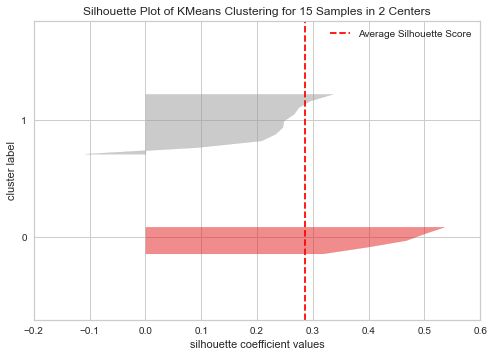

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 15 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [96]:
visualizer=SilhouetteVisualizer(model)
visualizer.fit(X11)
visualizer.poof()

In [97]:
dx=X11
dx['cluster']=model.labels_
dx

,Life_Ladder,Log_GDP_per_capita,Social_support,Freedom_to_make_life_choices,Freedom to make life choices,Generosity,Positive_affect,Positive affect,Negative_affect,cluster
0,-0.488881,-1.608657,0.116805,-1.688276,-0.523344,-0.454364,1.666541,-0.883384,-0.284443,1
1,-0.835404,-1.221190,-0.120868,-1.439679,-0.340634,0.159480,-0.758425,-0.319707,0.139063,1
2,-1.387326,-1.122848,-2.134271,-1.176749,-0.402740,0.494579,1.549395,-0.704841,-0.887579,1
3,-2.064066,-1.222137,0.071096,-0.898727,-0.392402,1.382370,-0.450306,1.177055,-0.228491,1
4,0.480227,-0.654489,0.259009,-0.604846,-0.612978,1.474844,0.308889,1.240404,0.176107,1
5,1.480286,-0.624047,-0.294976,-0.405846,1.571502,0.250335,0.754607,1.748306,-2.026930,1
6,0.690936,-0.058254,0.631883,-0.199632,-0.913509,0.048706,-0.185524,0.281048,-1.159933,1
7,0.517225,0.136177,1.598509,0.014033,-2.069494,0.780790,0.918505,0.066608,-1.037461,1
8,2.038188,0.185013,1.945971,0.235385,0.557590,1.610661,0.518563,-0.954522,-0.154602,1
9,0.441237,0.425581,-0.985112,0.464689,0.080434,-0.622652,0.115385,1.394310,-0.011402,1


In [98]:
df1['cluster']=model.labels_
df1

,Country_name,Life_Ladder,Log_GDP_per_capita,Social_support,Freedom_to_make_life_choices,Freedom to make life choices,Generosity,Positive_affect,Positive affect,Negative_affect,cluster
year,,,,,,,,,,,
2006,Thailand,5.885433,9.461148,0.894327,64.139999,0.863195,0.331460,0.934745,0.813509,0.164123,1
2007,Thailand,5.783891,9.508475,0.888634,64.480003,0.870159,0.390946,0.897753,0.831810,0.180010,1
2008,Thailand,5.636471,9.520327,0.831711,64.820000,0.867834,0.425482,0.933373,0.819038,0.145059,1
2009,Thailand,5.475645,9.508361,0.893245,65.160004,0.868224,0.524908,0.903822,0.897641,0.166086,1
2010,Thailand,6.216703,9.575911,0.897651,65.500000,0.859636,0.535985,0.916693,0.901268,0.181523,1
2011,Thailand,6.663609,9.579475,0.884351,65.720001,0.926882,0.400159,0.923196,0.934374,0.116676,1
2012,Thailand,6.300235,9.644709,0.906098,65.940002,0.846933,0.379859,0.908612,0.854544,0.137503,1
2013,Thailand,6.231025,9.666691,0.926378,66.160004,0.781082,0.456227,0.925430,0.845981,0.140831,1
2014,Thailand,6.985464,9.672178,0.933167,66.379997,0.899846,0.552521,0.919834,0.811370,0.168738,1


**Evalution**

In [99]:
visualizer.silhouette_score_

0.28680753772611217

In [100]:
print('Score -> {:.2f}'.format(visualizer.silhouette_score_))

Score -> 0.29


**Deployment**

สรุปความเเม่นย้ำ